1/1 [==============================] - 0s 25ms/step


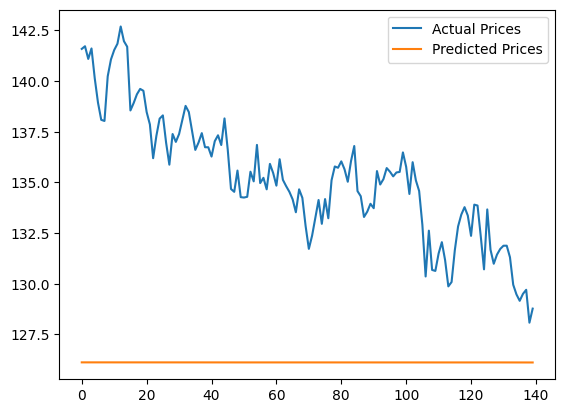

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Generate synthetic stock price data
def generate_stock_data(num_data_points):
    prices = [100.0]
    for _ in range(1, num_data_points):
        prices.append(prices[-1] + np.random.normal(0, 1))
    return np.array(prices)

# Create sequences of stock prices
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Generate synthetic data
num_data_points = 1000
data = generate_stock_data(num_data_points)

# Define sequence length and split data into train and test sets
sequence_length = 60
train_data = data[:int(num_data_points*0.8)]
test_data = data[int(num_data_points*0.8):]

# Create sequences for training
X_train, y_train = create_sequences(train_data, sequence_length)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Predict using the trained model
predicted_prices = []
for i in range(len(test_data) - sequence_length):
    seq = test_data[i:i+sequence_length]
    X_test = np.reshape(seq, (1, sequence_length, 1))
    predicted_price = model.predict(X_test)
    predicted_prices.append(predicted_price[0,0])

# Plot the results
plt.plot(test_data[sequence_length:], label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.show()